<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Text-Analytics:-Homework-4" data-toc-modified-id="Text-Analytics:-Homework-4-1">Text Analytics: Homework 4</a></span></li><li><span><a href="#Sentiment-Analysis-using-RNN" data-toc-modified-id="Sentiment-Analysis-using-RNN-2">Sentiment Analysis using RNN</a></span></li><li><span><a href="#Data-ingestion" data-toc-modified-id="Data-ingestion-3">Data ingestion</a></span></li><li><span><a href="#Sampling" data-toc-modified-id="Sampling-4">Sampling</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-5">Preprocessing</a></span></li><li><span><a href="#Keep-only-relevant-data" data-toc-modified-id="Keep-only-relevant-data-6">Keep only relevant data</a></span></li><li><span><a href="#Train-/-Heldout-/-Dev-sets" data-toc-modified-id="Train-/-Heldout-/-Dev-sets-7">Train / Heldout / Dev sets</a></span></li><li><span><a href="#Creating-word-embeddings" data-toc-modified-id="Creating-word-embeddings-8">Creating word embeddings</a></span><ul class="toc-item"><li><span><a href="#TF/IDF-vectorizer" data-toc-modified-id="TF/IDF-vectorizer-8.1">TF/IDF vectorizer</a></span></li><li><span><a href="#Plots" data-toc-modified-id="Plots-8.2">Plots</a></span></li><li><span><a href="#Statistics-and-Plots" data-toc-modified-id="Statistics-and-Plots-8.3">Statistics and Plots</a></span></li></ul></li><li><span><a href="#Models" data-toc-modified-id="Models-9">Models</a></span><ul class="toc-item"><li><span><a href="#Manual-Aproach" data-toc-modified-id="Manual-Aproach-9.1">Manual Aproach</a></span></li><li><span><a href="#Moving-to-models-with-more-hidden-layers" data-toc-modified-id="Moving-to-models-with-more-hidden-layers-9.2">Moving to models with more hidden layers</a></span></li><li><span><a href="#Automated-Approach" data-toc-modified-id="Automated-Approach-9.3">Automated Approach</a></span></li></ul></li><li><span><a href="#Assuming-that-this-is-our-best-working-model-parameters" data-toc-modified-id="Assuming-that-this-is-our-best-working-model-parameters-10">Assuming that this is our best working model parameters</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Visualization-of-the-MLP-architecture" data-toc-modified-id="Visualization-of-the-MLP-architecture-10.0.1">Visualization of the MLP architecture</a></span></li></ul></li></ul></li></ul></div>

# AUEB M.S.c in Data Science (part-time)
## Text Analytics: Homework 4

## Sentiment Analysis using RNN
using Twitter Dataset of a large number of tweets

Team members: 

- Kaplanis Alexandros (P3351802)
- Politis Spiros (P3351814)
- Proimakis Manos (P3351815)

## Data ingestion

In [1]:
import pandas as pd

pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

'''
    Ingests a dataset.
    
    :param file_path: Path from which to load a dataset.
    :param num_lines: Maximum number of lines to ingest.
    
    :returns: Pandas dataframe.
'''
def create_dataset(file_path:str, num_lines:int):
    df = pd.read_csv(
        file_path, \
        engine='python', \
        names=[
            'polarity',
            'id',
            'date',
            'query',
            'user',
            'text'
        ],
        index_col='id',
        sep=',', 
        header=None,
        nrows=num_lines,
        encoding = 'latin_1'
    )
    return df

In [2]:
import sys
original_training_df = create_dataset(
    'data/training.1600000.processed.noemoticon.csv', 
    sys.maxsize
)

original_test_df = create_dataset(
    'data/testdata.manual.2009.06.14.csv', 
    sys.maxsize
)

an example of data structure we have on our training set

In [3]:
display(original_training_df.head(10))
print("Size: ", len(original_training_df))

,polarity,date,query,user,text
id,,,,,
1467810369,0,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1467810672,0,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
1467810917,0,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
1467811184,0,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
1467811193,0,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."
1467811372,0,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
1467811592,0,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
1467811594,0,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,"@LOLTrish hey long time no see! Yes.. Rains a bit ,only a bit LOL , I'm fine thanks , how's you ?"
1467811795,0,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it


Size:  1600000


an example of the data structure we have on our test set

In [4]:
display(original_test_df.head(10))
print("Size: ", len(original_test_df))

,polarity,date,query,user,text
id,,,,,
9,0,Mon May 11 03:22:30 UTC 2009,aig,Seth937,Fuck this economy. I hate aig and their non loan given asses.
14,0,Mon May 11 03:32:48 UTC 2009,obama,kylesellers,"@Karoli I firmly believe that Obama/Pelosi have ZERO desire to be civil. It's a charade and a slogan, but they want to destroy conservatism"
17,0,Mon May 11 05:06:22 UTC 2009,nike,vincentx24x,"dear nike, stop with the flywire. that shit is a waste of science. and ugly. love, @vincentx24x"
19,0,Mon May 11 05:20:28 UTC 2009,lebron,luv8242,I was talking to this guy last night and he was telling me that he is a die hard Spurs fan. He also told me that he hates LeBron James.
21,0,Mon May 11 05:21:37 UTC 2009,lebron,ursecretdezire,"@ludajuice Lebron is a Beast, but I'm still cheering 4 the A..til the end."
119,0,Sat May 16 16:19:24 UTC 2009,google,vamsmack,Played with an android google phone. The slide out screen scares me I would break that fucker so fast. Still prefer my iPhone.
120,0,Sat May 16 16:25:41 UTC 2009,aig,schroncd,US planning to resume the military tribunals at Guantanamo Bay... only this time those on trial will be AIG execs and Chrysler debt holders
121,0,Sat May 16 22:42:07 UTC 2009,itchy,MarissaLeeD,omg so bored &amp; my tattoooos are so itchy!! help! aha =)
122,0,Sat May 16 22:42:25 UTC 2009,itchy,robloposky,I'm itchy and miserable!


Size:  359


how are the categories of tweets distrubuted between positive and negative

Text(0.5,1,'Dataset labels distribuition')

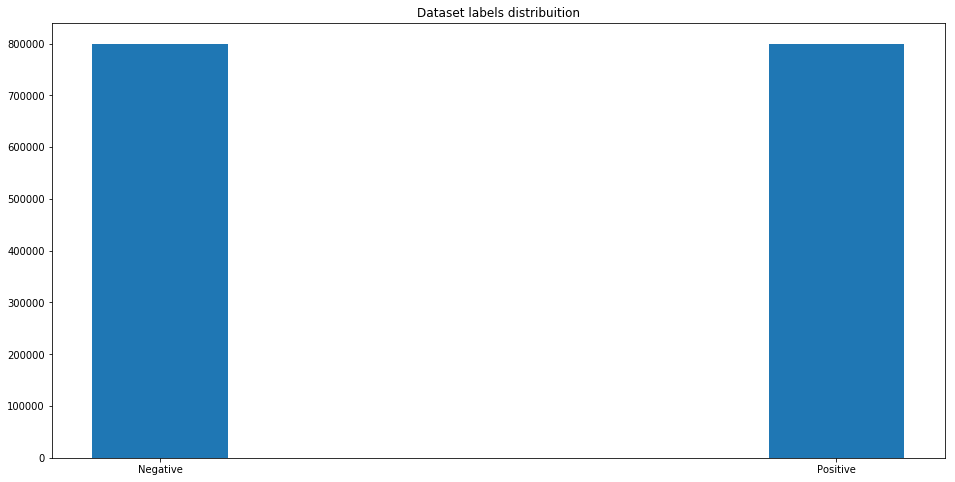

In [5]:
from collections import Counter
import matplotlib.pyplot as plt

%matplotlib inline

target_cnt = Counter(original_training_df['polarity'])

plt.figure(figsize=(16,8))
plt.bar(target_cnt.keys(), target_cnt.values())
plt.xticks([0, 4], ['Negative', 'Positive'])
plt.title("Dataset labels distribuition")

## Sampling

In order to ensure that our train / dev/ test /holdout sets follow the same probability distribution, since the dataset contains many samples and because half of them is Negative(0) and the other half is Positive(4) we cannot just take N random number of rows from the whole dataset and we need to distribute it beside the positive and negative samples which will be done as below.

The dataset contains thes same size of rows for Negative and Positive tweets, here we will keep a balanced set of 50000 positive and 50000 negative tweets taken randomly

In [6]:
num_rows_from_each_class = 100000
some_negative = original_training_df[original_training_df['polarity'] == 0].sample(num_rows_from_each_class)
some_positive = original_training_df[original_training_df['polarity'] == 4].sample(num_rows_from_each_class)

display(original_training_df.polarity.unique())
training_df = pd.concat([some_negative, some_positive])

array([0, 4])

## Preprocessing

In [7]:
import re

class Preprocess:
    @staticmethod
    def remove_tags(sentence):
        return re.sub(r'@[A-Za-z0-9]+', ' ', sentence)

    @staticmethod
    def remove_urls(sentence):
        return re.sub('https?://[A-Za-z0-9./]+', ' ', sentence)

    @staticmethod
    def remove_underscores(sentence):
        return re.sub(r'_[A-Za-z0-9]+', ' ', sentence)
    
    @staticmethod
    def remove_special_characters(sentence):
        return re.sub(r'\W', ' ', sentence)

    @staticmethod
    def remove_rem_tags(sentence):
        return re.sub(r'^@\s+', ' ', sentence)

    @staticmethod
    def remove_rem_underscores(sentence):
        return re.sub(r'^ _\s+', ' ', sentence)
    
    @staticmethod
    def remove_multiple_spaces(sentence):
        return re.sub(r' +', ' ', sentence)

    @staticmethod
    def remove_trailing_spaces(sentence):
        return sentence.strip()
    
def preprocess_row(row):
    row = Preprocess.remove_tags(row)
    row = Preprocess.remove_urls(row)
    row = Preprocess.remove_underscores(row)
    row = Preprocess.remove_special_characters(row)
    row = Preprocess.remove_rem_tags(row)
    row = Preprocess.remove_rem_underscores(row)
    row = Preprocess.remove_multiple_spaces(row)
    row = Preprocess.remove_trailing_spaces(row)
    row = row.lower()
    return row

In [8]:
df = training_df.copy()
df['text_before_preprocess'] = df['text']
df.drop(columns=['date', 'query'], axis=1, inplace=True)
df['length_before_preprocess'] = df['text_before_preprocess'].str.len()
df.reset_index(drop=True, inplace=True)

In [9]:
df['text']= df['text'].apply(lambda row: preprocess_row(row))
df['length'] = df['text'].str.len()

## Keep only relevant data
We keep only the list of texts to create the embeddings
and the list of the polarity per tweet as target

In [10]:
corpus = df['text'].values.tolist()
target = df['polarity'].values.tolist()

In [11]:
# Drop duplicate tweets
df = df.drop_duplicates(subset=['user','text'], keep = 'first')

In [12]:
df.drop(columns=['user'], axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)

## Train / Heldout / Dev sets

- Τraining set: will be used for the training of our MLP
- Heldout set: will be used for hyperparameter tuning
- Development (validation) set: will be used to monitor the performance of our MLP during training and optimization process

We have employed the established 50/25/25 rule.

In [13]:
import sklearn.model_selection

X_train, X_heldout_dev, y_train, y_heldout_dev = sklearn.model_selection.train_test_split(
    corpus, 
    target, 
    test_size = 0.25, 
    shuffle = True
)

X_heldout, X_dev, y_heldout, y_dev = sklearn.model_selection.train_test_split(
    X_heldout_dev, 
    y_heldout_dev, 
    test_size = 0.5, 
    shuffle = True
)

In [14]:
print('Size of X_train: ', len(X_train))
print('Size of X_heldout: ', len(X_heldout))
print('Size of X_dev: ', len(X_dev))
print('Size of y_train: ', len(y_train))
print('Size of y_heldout: ', len(y_heldout))
print('Size of y_dev: ', len(y_dev))

Size of X_train:  150000
Size of X_heldout:  25000
Size of X_dev:  25000
Size of y_train:  150000
Size of y_heldout:  25000
Size of y_dev:  25000


In [15]:
df_test = original_test_df.copy()
df_test.drop(columns=['date', 'query', 'user'], axis=1, inplace=True)
df_test.reset_index(drop=True, inplace=True)
df_test['text']= df_test['text'].apply(lambda row: preprocess_row(row))
X_test = df_test['text'].values.tolist()
y_test = df_test['polarity'].values.tolist()

In [16]:
import itertools
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)

le = preprocessing.LabelEncoder()
le.fit(y_dev)
y_dev = le.transform(y_dev)

le = preprocessing.LabelEncoder()
le.fit(y_heldout)
y_heldout = le.transform(y_heldout)

le = preprocessing.LabelEncoder()
le.fit(y_test)
y_test = le.transform(y_test)

In [17]:
def get_mismatched_tweets(x, y_true, y_pred):
    if( not (len(x) == len(y_true) == len(y_pred))):
        raise 'Invalid Sizes'
    return pd.DataFrame.from_dict([{'text': x[i], 'actual': y_true[i], 'predicted': y_pred[i]} for i in range(len(y_true)) if y_true[i]!=y_pred[i]])

## Creating word embeddings

### TF/IDF vectorizer

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

In [19]:
tf_idf_vectorizer = TfidfVectorizer(
        ngram_range=(1, 3),
        max_features=15000,
        sublinear_tf=True,
        lowercase = True,
        stop_words=stopwords.words('english')
    )

vectorized_x_train = tf_idf_vectorizer.fit_transform(X_train).toarray()
vectorized_x_heldout = tf_idf_vectorizer.transform(X_heldout).toarray()
vectorized_x_dev = tf_idf_vectorizer.transform(X_dev).toarray()
vectorized_x_test = tf_idf_vectorizer.transform(X_test).toarray()

### Plots

### Statistics and Plots

In [20]:
def plot_history(history):
    fig = plt.figure(figsize=(20,5))
    ax1 = fig.add_subplot(1, 3, 1)
    # summarize history for accuracy
    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_title('model accuracy')
    ax1.set_ylabel('accuracy')
    ax1.set_xlabel('epoch')
    ax1.legend(['train', 'test'], loc='upper left')

    ax2 = fig.add_subplot(1, 3, 2)
    # summarize history for loss
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title('model loss')
    ax2.set_ylabel('loss')
    ax2.set_xlabel('epoch')
    ax2.legend(['train', 'test'], loc='upper left')

    ax3 = fig.add_subplot(1, 3, 3)
    # summarize history for loss
    ax3.plot(history.history['f1'])
    ax3.plot(history.history['val_f1'])
    ax3.set_title('model f1')
    ax3.set_ylabel('f1')
    ax3.set_xlabel('epoch')
    ax3.legend(['train', 'test'], loc='upper left')

def print_evaluation(model, x_test, y_test):
    score = model.evaluate(x_test, y_test, verbose = 1, batch_size = 100)

    print('\nTest Binary_cross_entropy: %.4f' %  (score[0]))
    print('\nTest precision: %.4f' %  (score[1]))
    print('\nTest recall: %.4f' %  (score[2]))
    print('\nTest f1: %.4f' % (score[3]))
    print('\nTest accuracy: %.4f'% (score[4]))
    
def recall(y_true, y_pred):
    
    """
    Recall metric.
    Only computes a batch-wise average of recall.
    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def precision(y_true, y_pred):
    
    """
    Precision metric.
    Only computes a batch-wise average of precision.
    Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.
    Source
    ------
    https://github.com/fchollet/keras/issues/5400#issuecomment-314747992
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def f1(y_true, y_pred):
    
    """Calculate the F1 score."""
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * ((p * r) / (p + r))


def accuracy(y_true, y_pred):
    return K.mean(K.equal(y_true, K.round(y_pred)), axis=1)


Here we are defining our callbacks to pass to Keras

- checkpoint
    We will use this callback to save the best trained mlp 
- early stopping
    we will use this callback to stop at the right time before overffiting
    we chose to use min val_loss for early stopping monitoring because ti is to the metric for our type of model. and we would like be certain about the desision.


In [21]:
from keras_tqdm import TQDMNotebookCallback
from keras.callbacks import ModelCheckpoint, EarlyStopping

def checkpoint(name):
    return ModelCheckpoint(
        name, 
        monitor='val_f1', 
        verbose=1, 
        save_best_only=True, 
        mode='max'
    )

es = EarlyStopping(
    monitor='val_loss', 
    mode='min',
    patience=5,
    verbose=1
)

Using TensorFlow backend.


## Models